# Проект: открытие книжного онлайн магазина

## **Цель проекта** 

Компания купила крупный сервис для чтения книг по подписке. Необходимо проанализировать базу данных сервиса. Чтобы в дальнейшем сформулировать предложение для нового продукта.

## **Задачи проекта**

**Обзор данных**

- Загрузить библиотеки
- Загрузить данные

**Исследовательский анализ**

- Провести анализ базы данных

## Обзор данных

###  Загрузка библиотек

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

###  Загрузка данных

In [2]:
# устанавливаем параметры

# устанавливаем параметры
db_config = {'user': '-', # имя пользователя
'pwd': '-', # пароль
'host': '-',
'port': 1111, # порт подключения
'db': '-'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

**Описание данных**

В базе данных представлена информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. 

Таблица **books** содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

Таблица **authors** содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

Таблица **publishers** содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

Таблица **ratings** содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

Таблица **reviews** содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

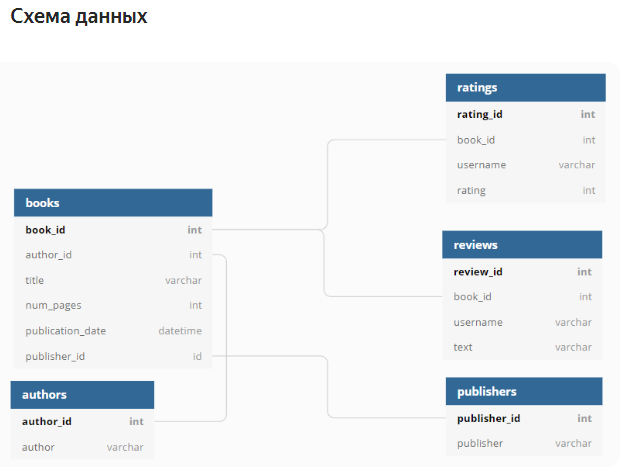

Выведем первые строки в таблицах, а так же посчитаем количество записей.

**books**

In [3]:
# формируем запрос и выводим данные
query = '''SELECT * 
FROM books 
LIMIT 5'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Количество строк в таблице `books`

In [4]:
query = '''SELECT COUNT(*)
FROM books '''
get_sql_data(query)

,count
0,1000


**authors**

In [5]:
# формируем запрос и выводим данные
query = '''SELECT * 
FROM authors 
LIMIT 5'''
get_sql_data(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Количество строк в таблице `authors`

In [6]:
query = '''SELECT COUNT(*)
FROM authors '''
get_sql_data(query)

,count
0,636


**publishers**

In [7]:
# формируем запрос и выводим данные
query = '''SELECT * 
FROM publishers 
LIMIT 5'''
get_sql_data(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Количество строк в таблице `publishers`

In [8]:
query = '''SELECT COUNT(*)
FROM publishers '''
get_sql_data(query)

,count
0,340


**ratings**

In [9]:
# формируем запрос и выводим данные
query = '''SELECT * 
FROM ratings
LIMIT 5
'''
get_sql_data(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Количество строк в таблице `ratings`

In [10]:
query = '''SELECT COUNT(*)
FROM ratings '''
get_sql_data(query)

,count
0,6456


**reviews**

In [11]:
# формируем запрос и выводим данные
query = '''SELECT * 
FROM reviews 
LIMIT 5'''
get_sql_data(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Количество строк в таблице `reviews`

In [12]:
query = '''SELECT COUNT(*)
FROM reviews '''
get_sql_data(query)

,count
0,2793


## Исследовательский анализ

Посчитаем количество книг вышедших после 2000 года.

In [13]:
# формируем запрос и выводим данные
query = '''SELECT count(title) 
FROM books 
WHERE publication_date::date >= '2000-01-01' '''
get_sql_data(query)

,count
0,821


После 2000 года вышло 821 книга.

Для каждой книги посчитаем количество обзоров и среднюю оценку

In [14]:
# формируем запрос и выводим данные
query = '''

SELECT
books.title AS book_name,
reviews_book.count_review,
AVG(ratings.rating) AS avg_rating

FROM books
LEFT JOIN (
        SELECT
            book_id,
            COUNT(username) AS count_review
        FROM
            reviews
        GROUP BY
            book_id
        ) AS reviews_book ON reviews_book.book_id = books.book_id
LEFT JOIN ratings ON ratings.book_id = books.book_id
GROUP BY books.title, reviews_book.count_review
ORDER BY avg_rating DESC

'''
get_sql_data(query)

,book_name,count_review,avg_rating
0,Homage to Catalonia,2.0,5.00
1,March,2.0,5.00
2,In the Hand of the Goddess (Song of the Liones...,2.0,5.00
3,Welcome to Temptation (Dempseys #1),2.0,5.00
4,Stone of Farewell (Memory Sorrow and Thorn #2),1.0,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3.0,2.25
996,Junky,2.0,2.00
997,His Excellency: George Washington,2.0,2.00
998,Drowning Ruth,3.0,2.00


Можно отметить минимальный рейтинг начинается с  1.50 максиальный 5 баллов.

Определим издательство,  которое выпустило наибольшее число книг толще 50 страниц.

In [15]:
# формируем запрос и выводим данные
query = '''SELECT publisher,
COUNT(title)
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE num_pages > 50
GROUP BY publisher
ORDER BY COUNT(title) DESC
LIMIT 1'''
get_sql_data(query)

,publisher,count
0,Penguin Books,42


Издательство Penguin Books выпустило наибольше число книг, в количестве 42 шт.

Определим автора с самой высокой средней оценкой книг (книги с 50 и более оценками).

In [16]:
# формируем запрос и выводим данные
query = '''

WITH br AS (
SELECT author_id,
b.book_id,
COUNT(rating_id) as rat_count,

AVG(rat.rating)

FROM books b
jOIN ratings rat ON b.book_id = rat.book_id

GROUP BY author_id, b.book_id
)

SELECT author, AVG(AVG)
FROM br
JOIN authors a ON br.author_id = a.author_id
WHERE rat_count > 50
GROUP BY author
ORDER BY avg DESC
LIMIT 1
'''

get_sql_data(query)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844


Cамая высокая средняя оценка у авторов J.K. Rowling/Mary GrandPré.

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [17]:
# формируем запрос и выводим данные
query = '''
WITH t AS (
  SELECT username,
  COUNT(book_id) AS rat_count
  FROM ratings
  GROUP BY username
  HAVING COUNT(book_id) > 48
)

SELECT AVG(review_count) AS average_reviews 

FROM (
  SELECT t.username, COUNT(review_id) AS review_count
  FROM t
  JOIN reviews ON reviews.username = t.username
  GROUP BY t.username
) AS user_reviews

'''
get_sql_data(query)

,average_reviews
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок = 24.

## Вывод

База данных содержит информацию о 1000 книгах, из которых 821 (82.1%) издана после 2000 года. Для 993 книг (99.3%) доступен рейтинг, варьирующийся от 1.5 до 5.

Помимо рейтинга, база данных включает пользовательские обзоры. Пользователи, оставившие более 48 оценок, написали в среднем по 24 обзора.

Наивысший средний рейтинг наблюдается у книг авторов J.K. Rowling/Mary GrandPré. Издательство Penguin Books лидирует по количеству опубликованных книг объемом более 50 страниц – 42 издания.